In [1515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings('ignore')
# We will use these flags to maintain dataframe integrity 
outliersRemoved = False
dataPrepared = False
dummyVarsCreated = False
catVarsRemoved = False

In [1516]:
# Read the csv file to a dataframe
carPriceDF = pd.read_csv('CarPrice_Assignment.csv')

### Exploratory Data Analysis

In [1517]:
# Examine the first few rows of the dataframe created
carPriceDF.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"13,495.00"
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,"16,500.00"
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,"16,500.00"
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,"13,950.00"
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,"17,450.00"


In [1518]:
# Check the datatypes of the columns of the dataframe
carPriceDF.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [1519]:
# Check the statistical parameters of the numerical variables.
carPriceDF.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,"2,555.57",126.91,3.33,3.26,10.14,104.12,"5,125.12",25.22,30.75,"13,276.71"
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,"7,988.85"
min,1.00,-2.00,86.60,141.10,60.30,47.80,"1,488.00",61.00,2.54,2.07,7.00,48.00,"4,150.00",13.00,16.00,"5,118.00"
25%,52.00,0.00,94.50,166.30,64.10,52.00,"2,145.00",97.00,3.15,3.11,8.60,70.00,"4,800.00",19.00,25.00,"7,788.00"
50%,103.00,1.00,97.00,173.20,65.50,54.10,"2,414.00",120.00,3.31,3.29,9.00,95.00,"5,200.00",24.00,30.00,"10,295.00"
75%,154.00,2.00,102.40,183.10,66.90,55.50,"2,935.00",141.00,3.58,3.41,9.40,116.00,"5,500.00",30.00,34.00,"16,503.00"
max,205.00,3.00,120.90,208.10,72.30,59.80,"4,066.00",326.00,3.94,4.17,23.00,288.00,"6,600.00",49.00,54.00,"45,400.00"


In [1520]:
# Check the dataframe information
carPriceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [1521]:
# Check if we have null values in out dataframe
carPriceDF.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

As we see above, we do not have any missing value in our dataframe.

In [1522]:
# Columns of the dataframe
carPriceDF.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [1523]:
# We have two columns 'doornumber' and 'cylindernumber' that have Cardinal nummbers
# We will convert Carinal number String to the numbrs.
carPriceDF['doornumber'] = carPriceDF['doornumber'].map({'two': 2, 'four': 4})
carPriceDF['cylindernumber'] = carPriceDF['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [1524]:
# Numerical olumns of the dataframe
numerical_columns = ['price','symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',\
                    'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'doornumber', 'cylindernumber']

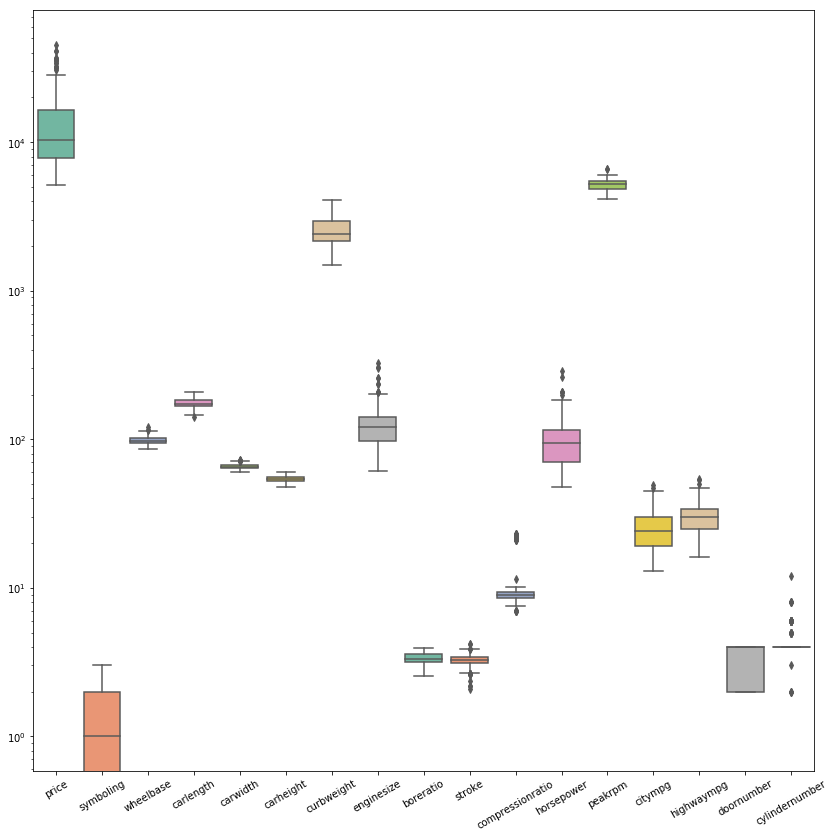

In [1525]:
# plotting distribution of numeric variables to check for outliers
plt.figure(figsize=(14, 14))
plt.rcParams["xtick.labelsize"] = 10
plt.xticks(rotation=30)
ax = sns.boxplot(data=carPriceDF[numerical_columns], orient="v", palette="Set2").set_yscale('log')

As we see in above box plots, we have some outliers in a few of the columns. We will check in more detail before calling these ouliers and removing.


0.00    48.00
0.10    68.00
0.20    69.00
0.30    76.00
0.40    87.20
0.50    95.00
0.60   102.00
0.70   114.00
0.80   134.20
0.90   160.00
1.00   288.00
Name: horsepower, dtype: float64


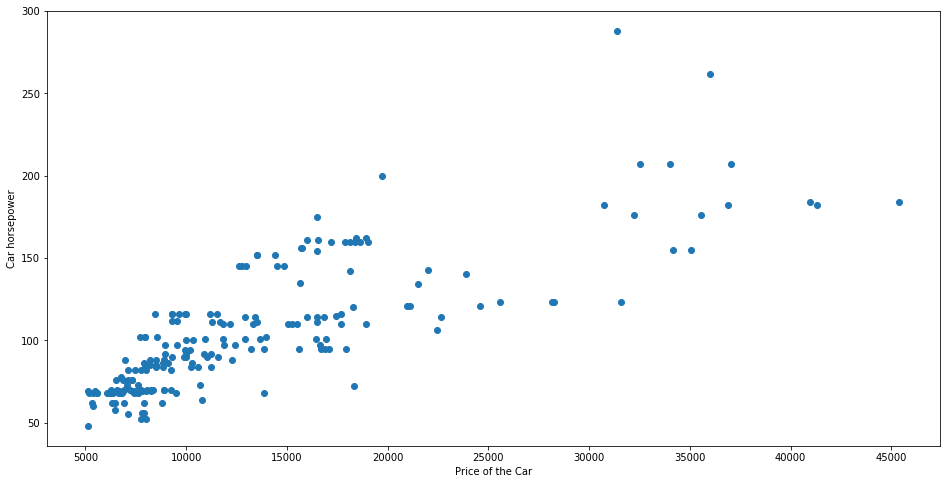

In [1526]:
#Get relevant percentiles and see their distribution for horsepower
print(carPriceDF['horsepower'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

# scatter plot between 'horseposer and price to check if the outliers in two columns are related
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(ol_df['price'], ol_df['horsepower'])
ax.set_xlabel('Price of the Car')
ax.set_ylabel('Car horsepower')
plt.show()

As we see above, we do not have considerable outliers, and the highr values of price and horsepower that we see are related.
This essentially means the higher prices are related with the horsepower of the car, and may not necessarily be an outlier.

0.00    61.00
0.10    91.00
0.20    97.00
0.30    98.00
0.40   109.00
0.50   120.00
0.60   122.00
0.70   136.00
0.80   152.00
0.90   181.00
1.00   326.00
Name: enginesize, dtype: float64


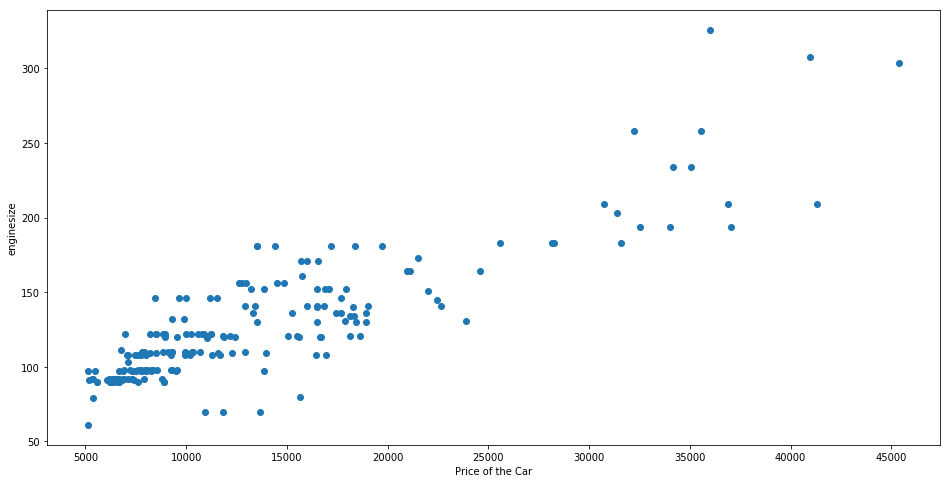

In [1527]:
#Get relevant percentiles and see their distribution for enginesize
print(carPriceDF['enginesize'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

# scatter plot between enginesize and price to check if the outliers in two columns are related
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(ol_df['price'], ol_df['enginesize'])
ax.set_xlabel('Price of the Car')
ax.set_ylabel('enginesize')
plt.show()

As we see above, we do not have considerable outliers, and the highr values of price and enginesize that we see are related.
This essentially means the higher prices are related with the enginesize of the car, and may not necessarily be an outlier.

We will further check the Min, Max, Mean, and values in different quantile.

In [1528]:
# Calculate and analyze the Mean, Median and different dispersion measures.
# We will check the dispersion of the values and take a call on removing the outliers
for variable in numerical_columns:
    print('\033[1m'+ '\033[4m' +variable+ '\033[0m')
    print()
    print('Mean : {0}'.format(round(carPriceDF[variable].mean(), 2))) # mean
    print('Median : {0}'.format(round(carPriceDF[variable].median(),2 ))) # median
    # dispersion measures
    print('Min '+variable+' : {0}'.format(round(carPriceDF[variable].min(), 2))) # minimum
    print('Max '+variable+' : {0}'.format(round(carPriceDF[variable].max(), 2))) # maximum
    print('Range of '+variable+' : {0}'.format(round(carPriceDF[variable].max()  - carPriceDF[variable].min()), 2)) # range
    print('25 percentile : {0}'.format(round(carPriceDF[variable].quantile(.25), 2))) # 25 percentile
    print('50 percentile : {0}'.format(round(carPriceDF[variable].quantile(.5), 2))) # 50 percentile
    print('75 percentile : {0}'.format(round(carPriceDF[variable].quantile(.75), 2))) # 75 percentile
    print('Variance : {0}'.format(round(carPriceDF[variable].var(), 2))) # variance
    print('Standard deviation : {0}'.format(round(carPriceDF[variable].std(), 2))) # standard deviation
    print('')

price

Mean : 13276.71
Median : 10295.0
Min price : 5118.0
Max price : 45400.0
Range of price : 40282.0
25 percentile : 7788.0
50 percentile : 10295.0
75 percentile : 16503.0
Variance : 63821761.58
Standard deviation : 7988.85

symboling

Mean : 0.83
Median : 1.0
Min symboling : -2
Max symboling : 3
Range of symboling : 5
25 percentile : 0.0
50 percentile : 1.0
75 percentile : 2.0
Variance : 1.55
Standard deviation : 1.25

wheelbase

Mean : 98.76
Median : 97.0
Min wheelbase : 86.6
Max wheelbase : 120.9
Range of wheelbase : 34.0
25 percentile : 94.5
50 percentile : 97.0
75 percentile : 102.4
Variance : 36.26
Standard deviation : 6.02

carlength

Mean : 174.05
Median : 173.2
Min carlength : 141.1
Max carlength : 208.1
Range of carlength : 67.0
25 percentile : 166.3
50 percentile : 173.2
75 percentile : 183.1
Variance : 152.21
Standard deviation : 12.34

carwidth

Mean : 65.91
Median : 65.5
Min carwidth : 60.3
Max carwidth : 72.3
Range of carwidth : 12.0
25 percentile : 64.1
50 percentile

We did see some outliers, but we will not be reomoving the those values because of below reasons:

1- The higher values of columns like - horsepower and enginesize are correlated with Car price.

2- Car prices are higher for better Car configurations. Like if a Car's engine size is bigger, the Car prices are higher.

3- Because outliers are not significantly high, the Model training would not be affected much. 
   But on the other hand, given a small sample size of the CarPrice data, the removal of not-so-significant outliers may affect    the prediction quality.

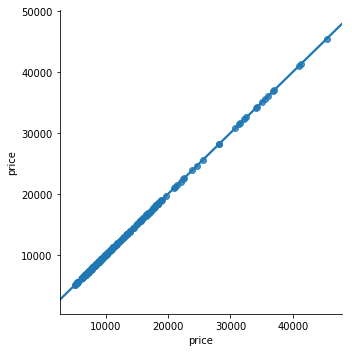

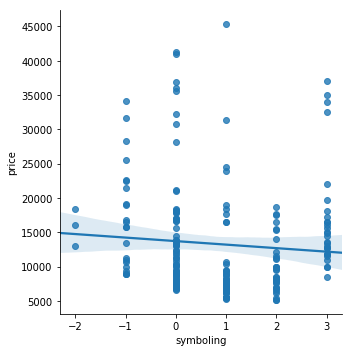

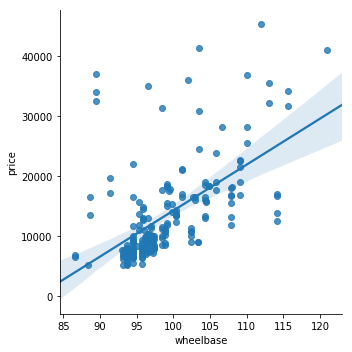

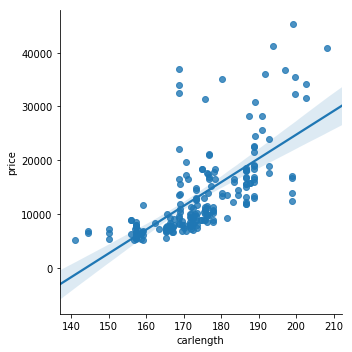

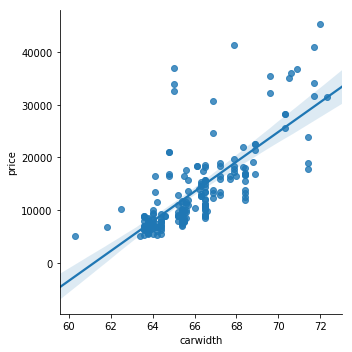

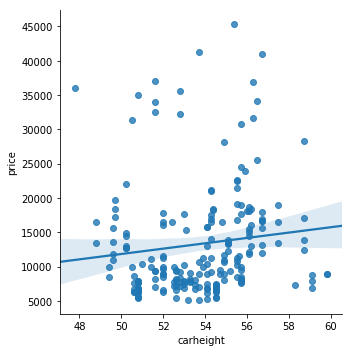

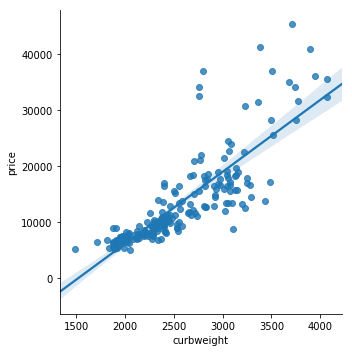

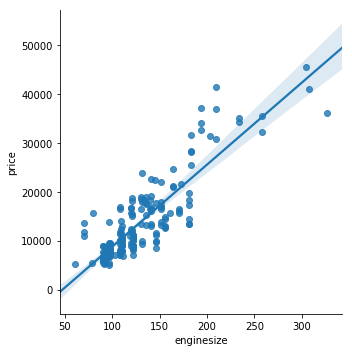

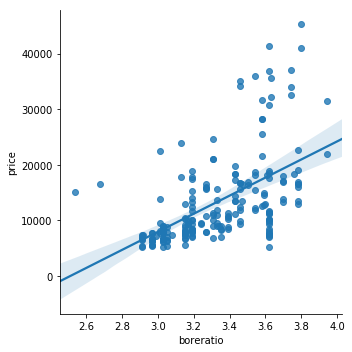

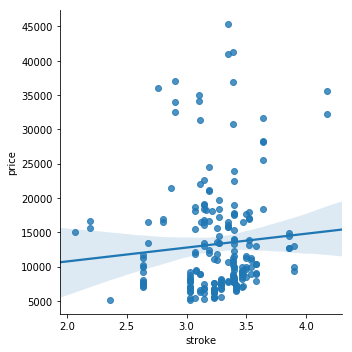

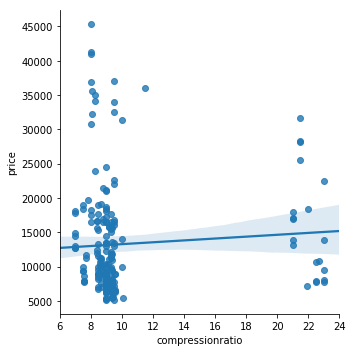

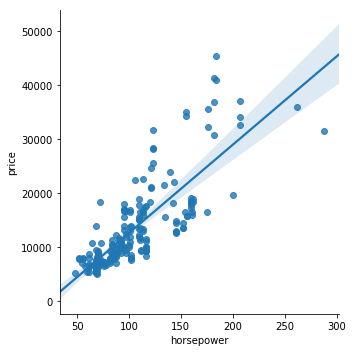

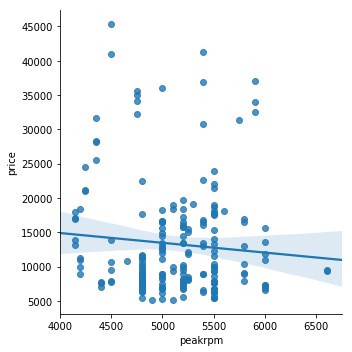

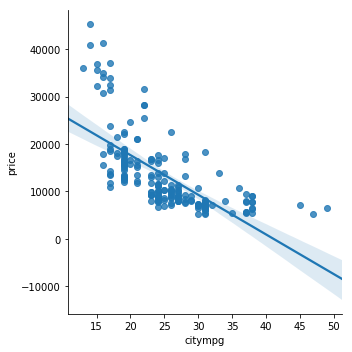

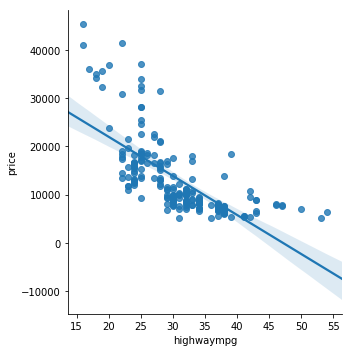

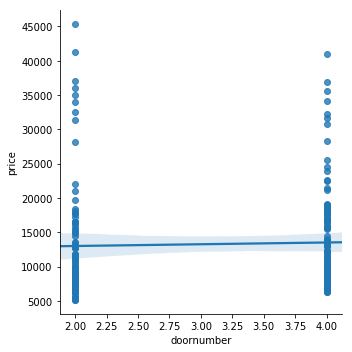

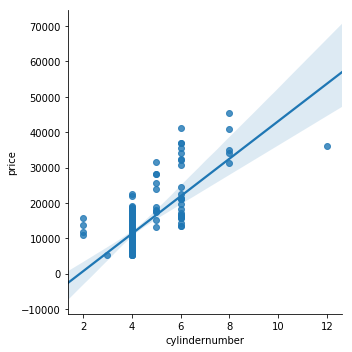

In [1529]:
# Plot lmplot for all the numerical variables against price
for col in numerical_columns:
    sns.lmplot(x=col, y='price',data=carPriceDF);

Observations:

1- symbolink, carheight, stroke, compressionratio, peakrpm, and doornumber seem to have negligible correlation with price.

2- cylindernumber, wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, and horsepower are highly correlated with price. Car price increases as these parameters increase.

3- highwaympg and citympg too have a good correlation with price. But Car price decreases as these parameters increase.


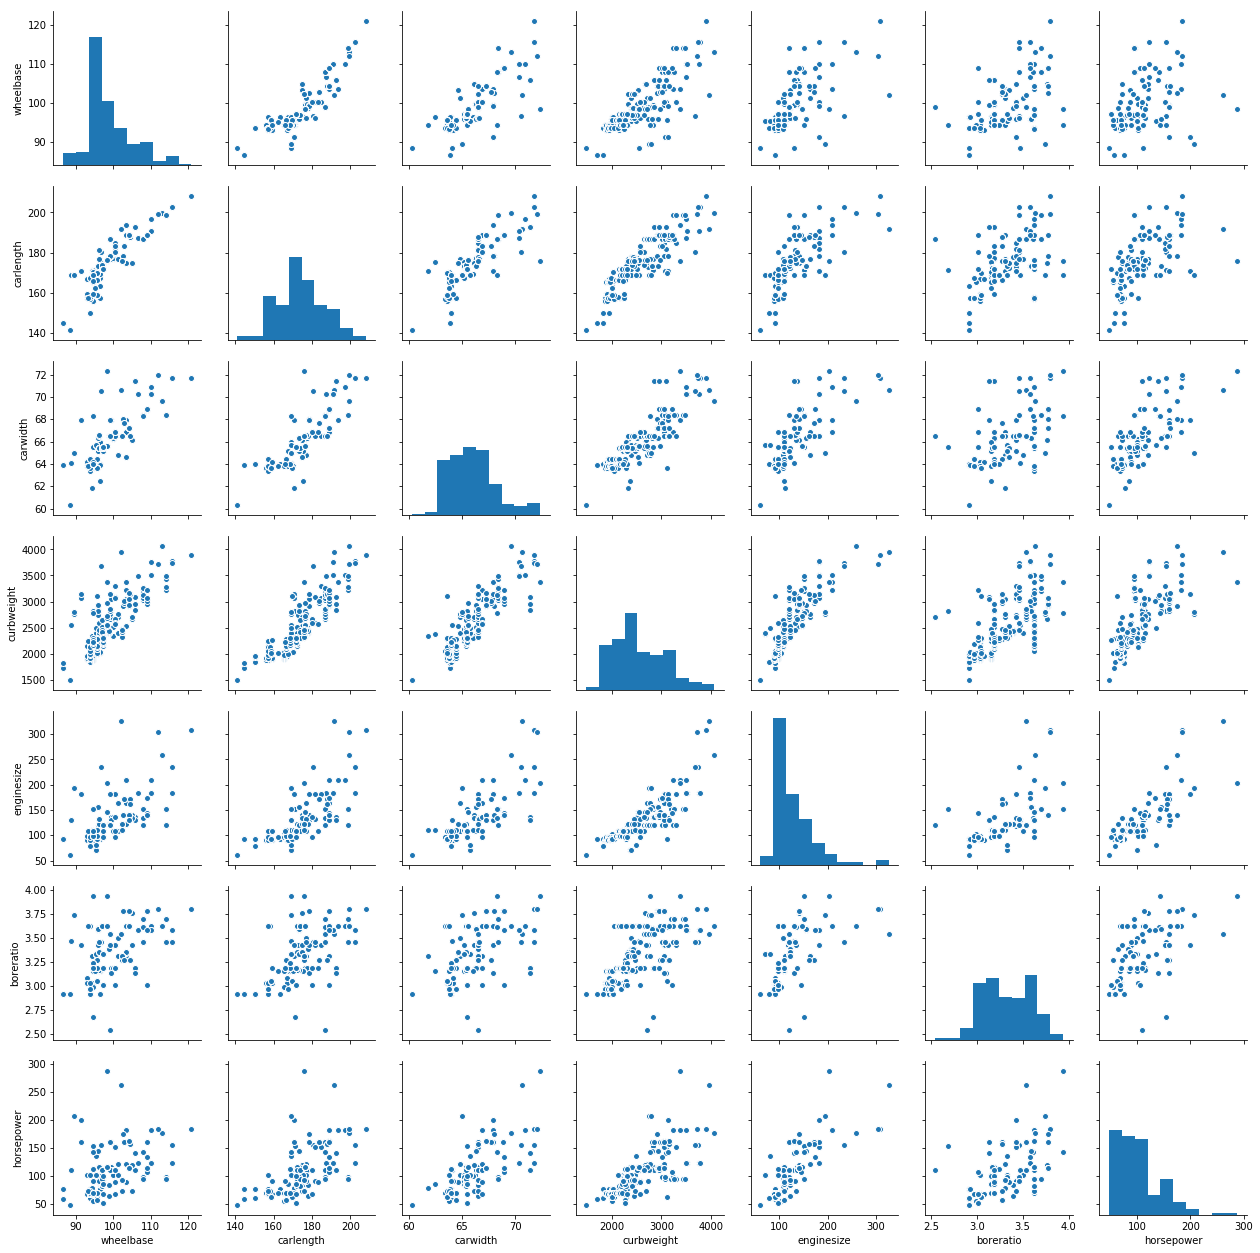

In [1530]:
# Pairplot for the features that have correlation with Target variable.
plt.rcParams['figure.figsize']=(5,5)
sns.pairplot(carPriceDF[['wheelbase' , 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower']]);

Most of the numerical variables have a very good correlationship with each other.

Now we will check the correlation metrices.

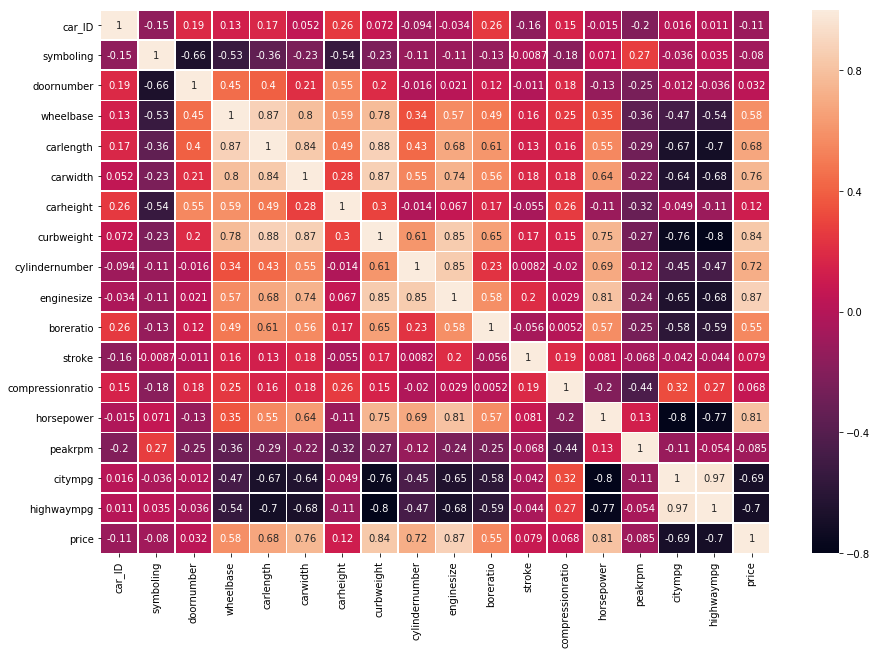

In [1531]:
# Check the correlation between numerical columns
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(carPriceDF.corr(), annot=True, linewidths=.5, ax=ax);

We see in correlation matrix and pairplots that some of the variables are highly correlated - positively and negatively both.
Example: 

1- highwaympg and citympg have 97% correlatioon. 

2- highwaympg and citympg are highly negatively correlated with horsepower, curbweight, boreratio,carwidth, carlength and enginesize.

3- Carweight is highly correlated with carlength, carwidth, carbase, horsepower, boreratio, and enginesize

4- Enginetype, Carweight, and carwidth are highly correlated with price.


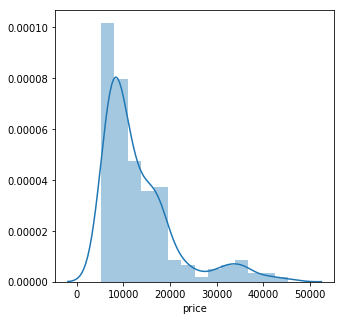

In [1532]:
# Check the price distribution
sns.distplot(carPriceDF['price']);

In [1533]:
# List of all Categorical variables
categorical_columns = ['CarName','fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',\
                      'cylindernumber', 'fuelsystem']

In [1534]:
carPriceDF.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

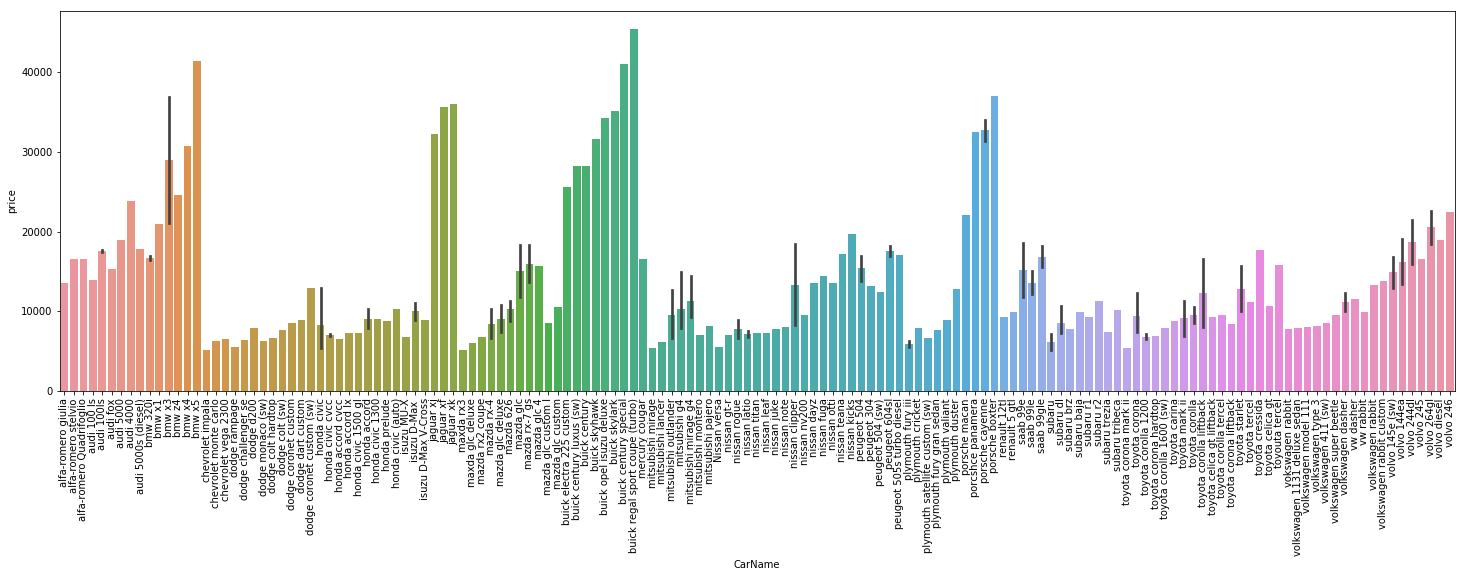

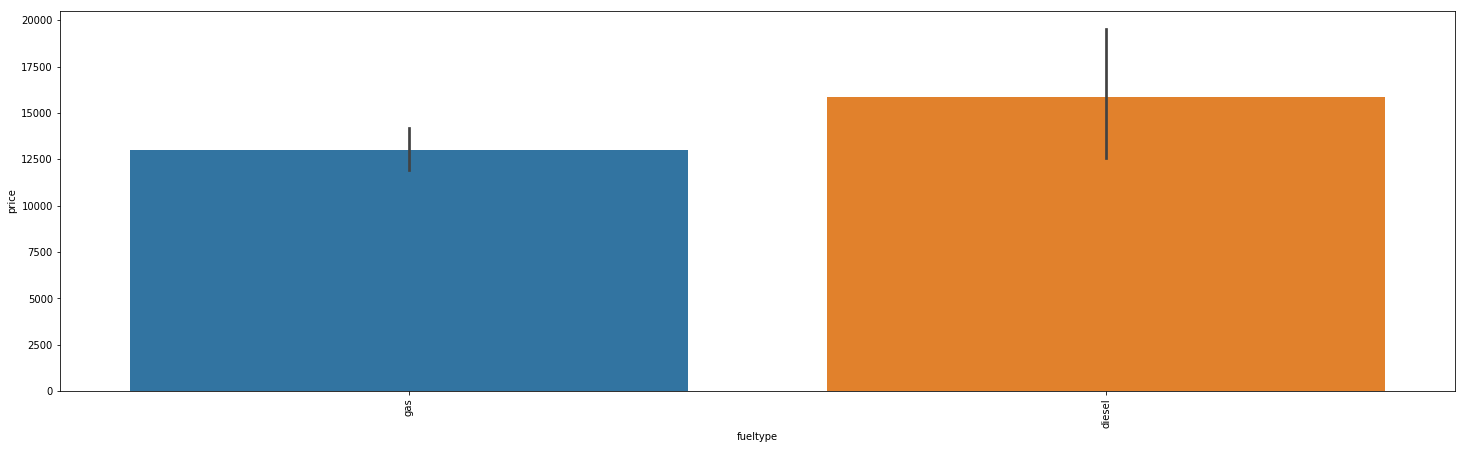

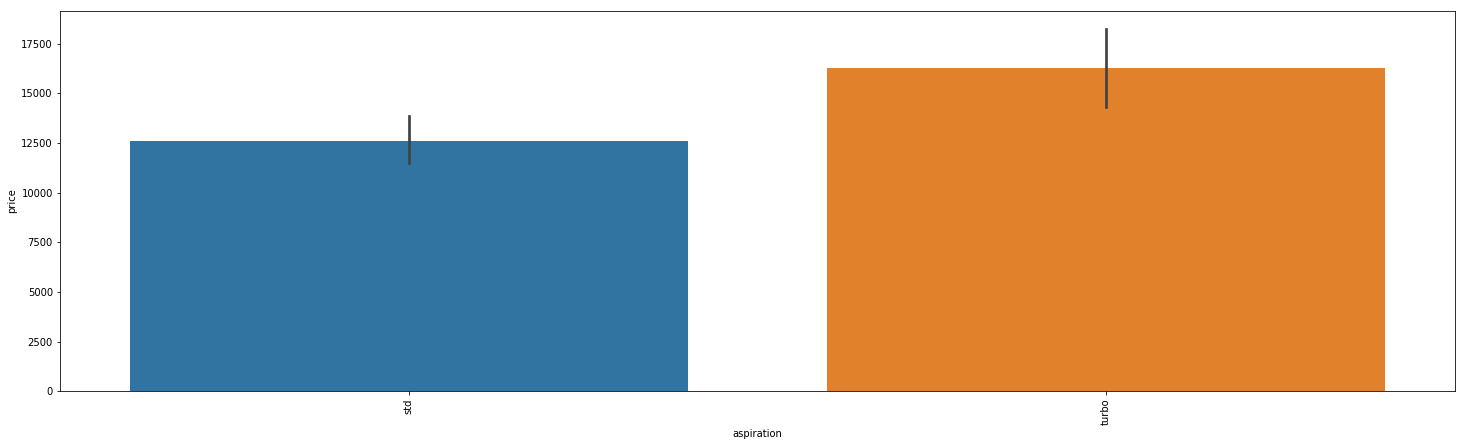

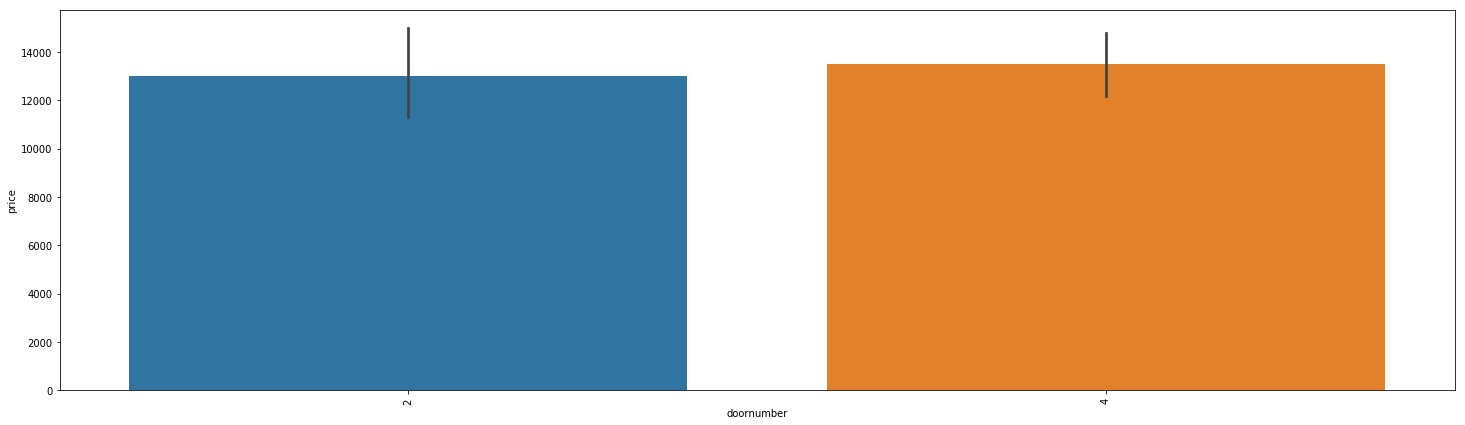

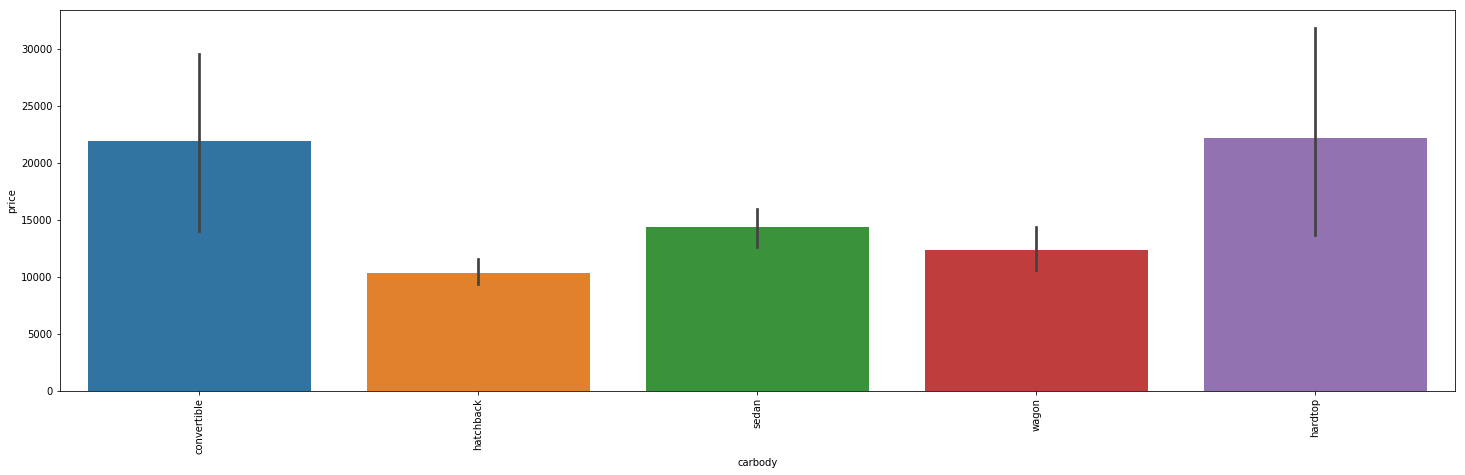

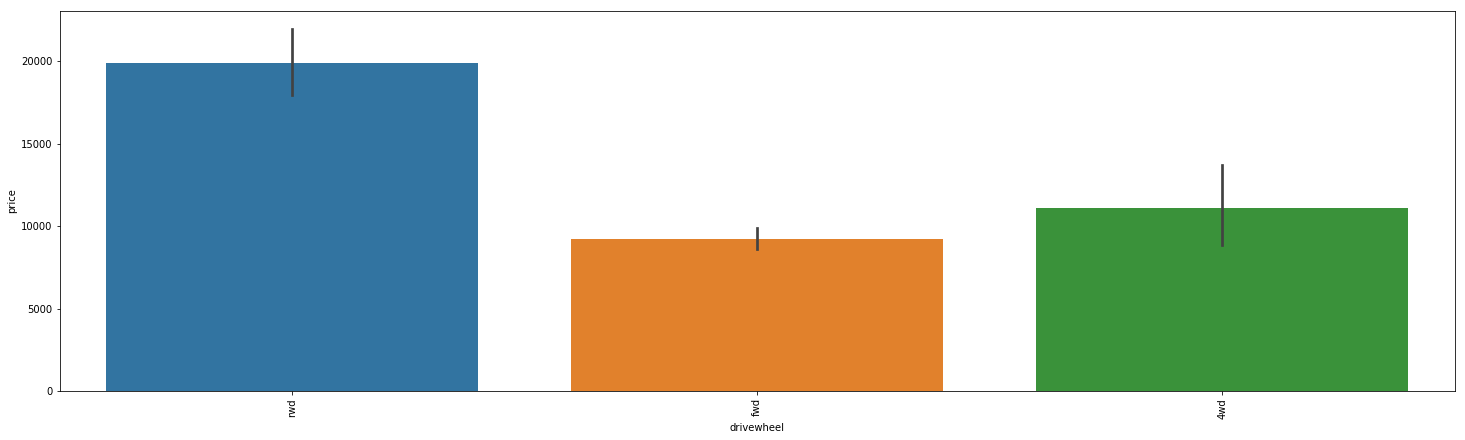

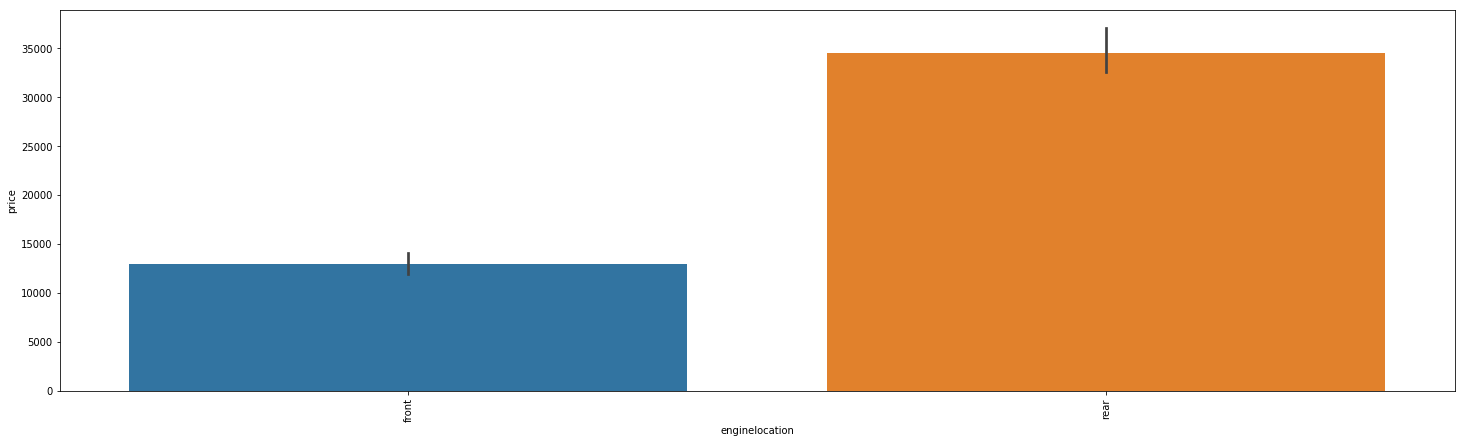

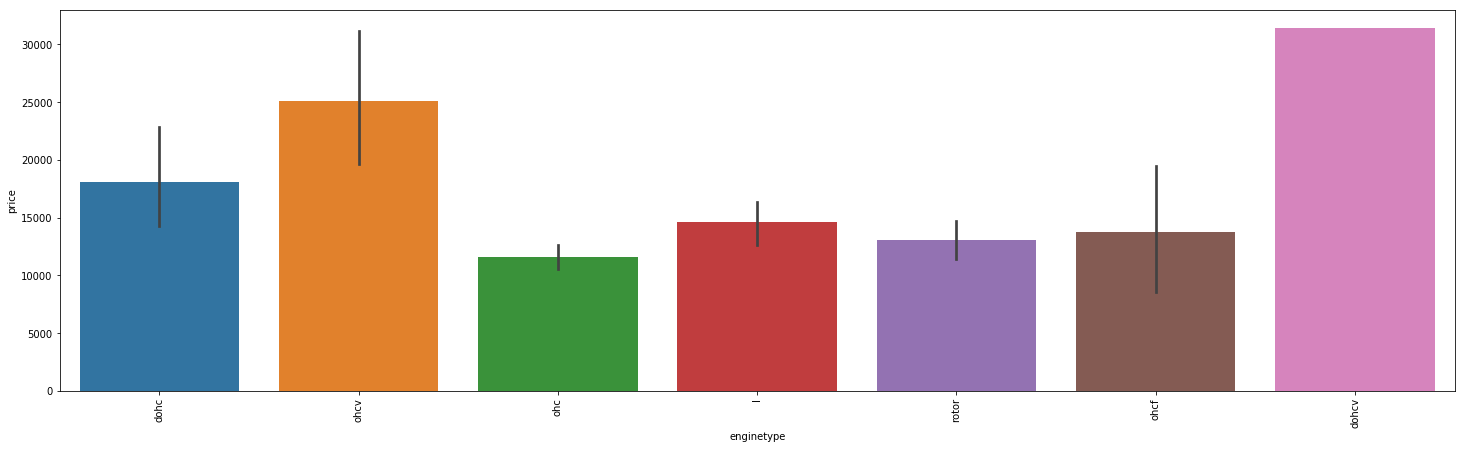

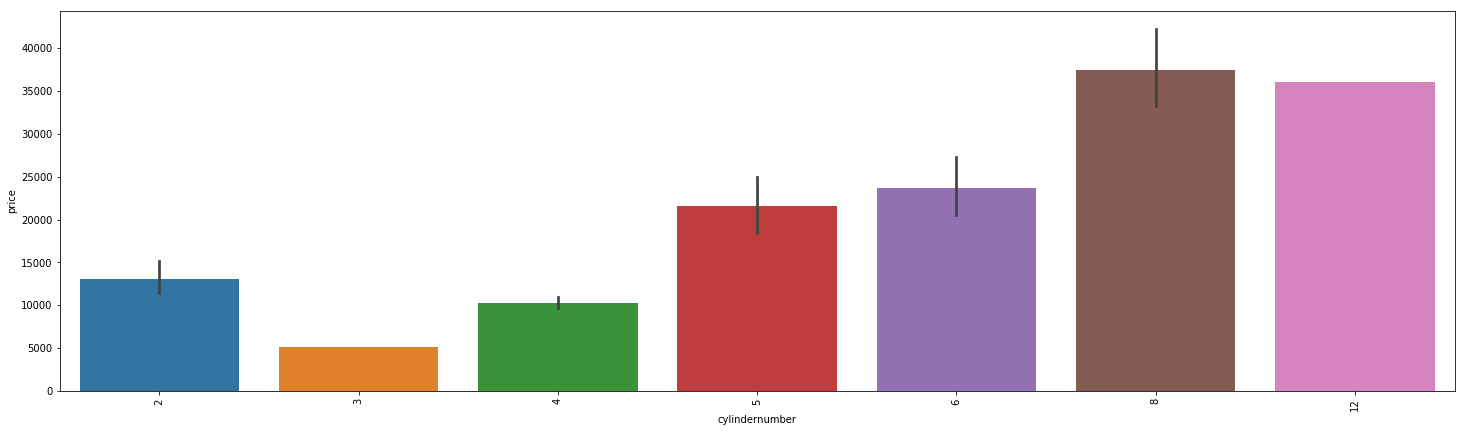

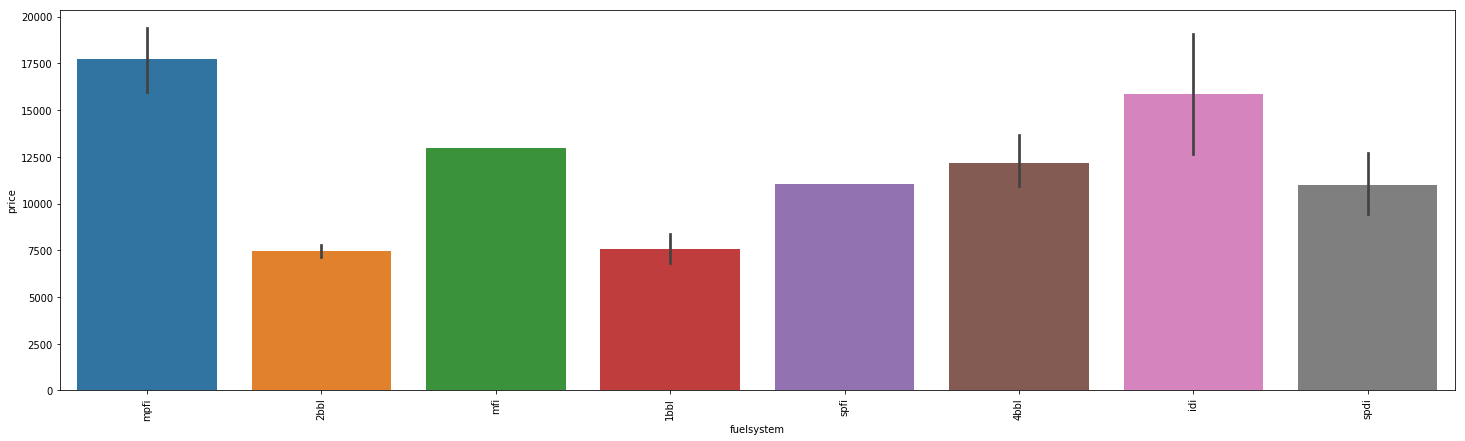

In [1535]:
# Create barplot between columns in categorical_columns and price. 
# And check how the Car price is related with these categorical variables.
sns.mpl.rc("figure", figsize=(25,7))
for col in categorical_columns:
    ax = sns.barplot(x=col, y='price', data=carPriceDF)
    plt.xticks(rotation=90)
    plt.show()

Observations:

1- We see significant variations in Car Prices for different brands.

2- Prices of brands like Jaguar, Porsche, and BMW are significantly high compared to other brands.

3- Prices of Cars with different fueltypes, enginetype, carbody, aspiration, and doornumer have relatively lower variance.

4- Cylindernumber and enginelocation have significantly high Price variance.

### Data preparation

In [1536]:
carPriceDF.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [1537]:
carPriceDF.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

We will derive a new variable - power_to_weight_ratio from two columns: horsepower and curbweight.

Power to weight ratio is basically, the measure of what makes a small engine car powerful and a big-engine beast docile.
horsepower divided by curb weight gives the power-to-weight ratio, which is represented as horsepower to 10 pounds. The higher the number, the better the car is going to be in terms of performance.

Reference: https://www.motor1.com/news/76305/heres-what-a-power-to-weight-ratio-means-for-car-buyers/

In [1538]:
# dDividing 'horsepower' by 'curbweight' and creating a new variable -power_to_weight_ratio 
carPriceDF['power_to_weight_ratio'] = carPriceDF['horsepower']/carPriceDF['curbweight']

In [1539]:
carPriceDF[['horsepower', 'curbweight', 'power_to_weight_ratio']]

,horsepower,curbweight,power_to_weight_ratio
0,111,2548,0.04
1,111,2548,0.04
2,154,2823,0.05
3,102,2337,0.04
4,115,2824,0.04
5,110,2507,0.04
6,110,2844,0.04
7,110,2954,0.04
8,140,3086,0.05
9,160,3053,0.05


In [1540]:
# List of clumns for which we will create dummy variables
cols_for_dummy_var = ['CarName','carbody', 'drivewheel', 'enginetype', 'fuelsystem', 'fueltype', 'aspiration', 'enginelocation']

In [1541]:
# Get the company name from the CarName column
carPriceDF['CarName'] = carPriceDF['CarName'].apply(lambda cn: cn.split()[0])

In [1542]:
# # Correct the spelling mistakes in CarName values
carPriceDF['CarName'] = carPriceDF['CarName'].str.lower()
carPriceDF['CarName'] = carPriceDF['CarName'].apply(lambda cn: cn.replace('toyouta','toyota'))
carPriceDF['CarName'] = carPriceDF['CarName'].apply(lambda cn: cn.replace('vokwagen','volkswagen'))
carPriceDF['CarName'] = carPriceDF['CarName'].apply(lambda cn: cn.replace('vokswagen','volkswagen'))
carPriceDF['CarName'] = carPriceDF['CarName'].apply(lambda cn: cn.replace('maxda','mazda'))
carPriceDF['CarName'] = carPriceDF['CarName'].apply(lambda cn: cn.replace('porcshce','porsche'))
carPriceDF['CarName'] = carPriceDF['CarName'].apply(lambda cn: cn.replace('vw','volkswagen'))

In [1543]:
# Create dummy variables for the columns in cols_for_dummy_var
if dummyVarsCreated == False:
    for var in cols_for_dummy_var:
        varDF = carPriceDF[var]
        # Create dummy variables
        carPrice_dummy = pd.get_dummies(varDF, prefix=var, drop_first=True)
        # Add the result to the carPriceDF dataframe
        carPriceDF = pd.concat([carPriceDF,carPrice_dummy],axis=1)
dummyVarsCreated = True

In [1544]:
carPriceDF.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'power_to_weight_ratio', 'CarName_audi', 'CarName_bmw',
       'CarName_buick', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'engi

Here we notice that we have some spelling mistakes in Car names, e.g. toyouta, vokswagen, maxda, and porcshce.
Also one of the Car names in the dataset is vw, assuming this is a shrt name of Volkswagen, we will treat this as well.
Please note - we will go a setp back, will treat these findings and then will create the dummy variable.

In [1545]:
# Drop all the columns for which dummy variables are created.
if catVarsRemoved == False:
    carPriceDF.drop(cols_for_dummy_var, axis=1, inplace=True)
    # We will drop the car_ID column
    carPriceDF.drop('car_ID', axis=1, inplace=True)
    catVarsRemoved = True

In [1546]:
carPriceDF.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'power_to_weight_ratio', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mercury', 'CarName_mitsubishi', 'CarName_nissan',
       'CarName_peugeot', 'CarName_plymouth', 'CarName_porsche',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsyst

In [1547]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
price = carPriceDF[['price']]
carPriceDF = carPriceDF.drop(['price'], axis=1).apply(normalize)
carPriceDF['price'] = price
carPriceDF.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fueltype_gas,aspiration_turbo,enginelocation_rear,price
0,1.00,0.00,0.06,0.41,0.32,0.08,0.41,0.20,0.26,0.66,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,"13,495.00"
1,1.00,0.00,0.06,0.41,0.32,0.08,0.41,0.20,0.26,0.66,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,"16,500.00"
2,0.60,0.00,0.23,0.45,0.43,0.38,0.52,0.40,0.34,0.10,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,"16,500.00"
3,0.80,1.00,0.38,0.53,0.49,0.54,0.33,0.20,0.18,0.46,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,"13,950.00"
4,0.80,1.00,0.37,0.53,0.51,0.54,0.52,0.30,0.28,0.46,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,"17,450.00"


#### Splitting data into Training and Testing sets

In [1548]:
carPriceDF.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'power_to_weight_ratio', 'CarName_audi', 'CarName_bmw',
       'CarName_buick', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',


In [1549]:
# Putting all the independent varaiables in X
features = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'power_to_weight_ratio', 'CarName_audi', 'CarName_bmw',
       'CarName_buick', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'fueltype_gas', 'aspiration_turbo',
       'enginelocation_rear']
X = carPriceDF[features]
# Putting the dependent/target variable in y 
y = carPriceDF['price']

In [1550]:
from sklearn.cross_validation import train_test_split
# Split the data into traing and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

#### Building a linear model

In [1551]:
# Use RFE to select 25 features to build the 1st model.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
names = carPriceDF[features]
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=25)
rfe.fit(X_train,y_train)
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))
print(rfe.support_)

Features sorted by their rank:
[(1, 'CarName_bmw'), (1, 'CarName_buick'), (1, 'CarName_peugeot'), (1, 'CarName_porsche'), (1, 'CarName_saab'), (1, 'CarName_subaru'), (1, 'boreratio'), (1, 'carbody_hardtop'), (1, 'carbody_hatchback'), (1, 'carbody_sedan'), (1, 'carbody_wagon'), (1, 'carheight'), (1, 'carlength'), (1, 'carwidth'), (1, 'curbweight'), (1, 'cylindernumber'), (1, 'enginelocation_rear'), (1, 'enginesize'), (1, 'enginetype_l'), (1, 'enginetype_ohcf'), (1, 'enginetype_rotor'), (1, 'fuelsystem_4bbl'), (1, 'horsepower'), (1, 'power_to_weight_ratio'), (1, 'wheelbase'), (2, 'peakrpm'), (3, 'aspiration_turbo'), (4, 'CarName_mitsubishi'), (5, 'CarName_plymouth'), (6, 'CarName_dodge'), (7, 'CarName_renault'), (8, 'CarName_honda'), (9, 'enginetype_dohcv'), (10, 'compressionratio'), (11, 'CarName_jaguar'), (12, 'CarName_chevrolet'), (13, 'CarName_volkswagen'), (14, 'CarName_nissan'), (15, 'CarName_isuzu'), (16, 'CarName_toyota'), (17, 'fueltype_gas'), (18, 'CarName_audi'), (19, 'fuelsys

In [1552]:
carPriceDF.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fueltype_gas,aspiration_turbo,enginelocation_rear,price
0,1.00,0.00,0.06,0.41,0.32,0.08,0.41,0.20,0.26,0.66,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,"13,495.00"
1,1.00,0.00,0.06,0.41,0.32,0.08,0.41,0.20,0.26,0.66,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,"16,500.00"
2,0.60,0.00,0.23,0.45,0.43,0.38,0.52,0.40,0.34,0.10,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,"16,500.00"
3,0.80,1.00,0.38,0.53,0.49,0.54,0.33,0.20,0.18,0.46,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,"13,950.00"
4,0.80,1.00,0.37,0.53,0.51,0.54,0.52,0.30,0.28,0.46,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,"17,450.00"


In [1553]:
# Columns that are NOT included in the Model by the RFE
col_not_in_model = X_train.columns[~rfe.support_].tolist()

In [1554]:
col_not_in_model

['symboling',
 'doornumber',
 'stroke',
 'compressionratio',
 'peakrpm',
 'citympg',
 'highwaympg',
 'CarName_audi',
 'CarName_chevrolet',
 'CarName_dodge',
 'CarName_honda',
 'CarName_isuzu',
 'CarName_jaguar',
 'CarName_mazda',
 'CarName_mercury',
 'CarName_mitsubishi',
 'CarName_nissan',
 'CarName_plymouth',
 'CarName_renault',
 'CarName_toyota',
 'CarName_volkswagen',
 'CarName_volvo',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginetype_dohcv',
 'enginetype_ohc',
 'enginetype_ohcv',
 'fuelsystem_2bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi',
 'fueltype_gas',
 'aspiration_turbo']

In [1555]:
# Columns selected by the RFE
rfe_col = X_train.columns[rfe.support_]

In [1556]:
# Creating X_test dataframe with RFE selected variables
X_train = X_train[rfe_col]

In [1557]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [1558]:
# Running the linear model
carPrice_model_1 = sm.OLS(y_train,X_train).fit()

In [1559]:
print(carPrice_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     95.14
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           7.80e-66
Time:                        15:19:35   Log-Likelihood:                -1268.6
No. Observations:                 143   AIC:                             2587.
Df Residuals:                     118   BIC:                             2661.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.87e+

In [1560]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [1561]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
24,enginelocation_rear,inf
21,enginetype_ohcf,inf
15,CarName_subaru,inf
8,horsepower,142.81
4,curbweight,118.32
9,power_to_weight_ratio,115.50
1,carlength,113.40
6,enginesize,71.80
2,carwidth,62.75
0,wheelbase,48.18


### Feature elimination for High P Value and High VIF

In [1562]:
# A higher value of VIF(inf) indicates multicollinearity.
# This is because RSS for the variable is 0 as the model has predicted all values correctly and all Y = Ypredicted. 
# RSS = 0. therefore, Rsquard = 1. therefore, VIF = infinity.
# We will remove the variables with such hight collinearity
# We will drop 'CarName_subaru' first, because this is not Car property while enginetype and enginelocation are.
if 'CarName_subaru' in X_train.columns:
    X_train = X_train.drop('CarName_subaru', 1)
# Add CarName_subaru to col_not_in_model 
col_not_in_model.append('CarName_subaru')
# Create a 2nd fitted model
carPrice_model_2 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     95.14
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           7.80e-66
Time:                        15:19:37   Log-Likelihood:                -1268.6
No. Observations:                 143   AIC:                             2587.
Df Residuals:                     118   BIC:                             2661.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.87e+

In [1563]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
8,horsepower,142.81
4,curbweight,118.32
9,power_to_weight_ratio,115.50
1,carlength,113.40
6,enginesize,71.80
2,carwidth,62.75
0,wheelbase,48.18
5,cylindernumber,43.77
7,boreratio,43.28
3,carheight,21.65


In [1564]:
# We see a few variables with very high VIF. These variables are highly correlated, 
# as we have created power_to_weight_ratio from horsepower and curbweight
# Out of these three highly correlated variables, curbweight has the highest P-value.
# Therefore, Let us drop curbweight
if 'curbweight' in X_train.columns:
    X_train = X_train.drop('curbweight', 1)
# Add curbweight to col_not_in_model 
col_not_in_model.append('curbweight')
# Create a 2nd fitted model
carPrice_model_3 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     99.85
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.95e-67
Time:                        15:19:38   Log-Likelihood:                -1268.8
No. Observations:                 143   AIC:                             2586.
Df Residuals:                     119   BIC:                             2657.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.72e+

In [1565]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
1,carlength,98.47
7,horsepower,88.46
8,power_to_weight_ratio,83.94
5,enginesize,71.23
2,carwidth,61.15
0,wheelbase,47.50
4,cylindernumber,43.61
6,boreratio,40.40
3,carheight,21.07
16,carbody_sedan,20.69


Now we will drop the variables with unacceptably high VIF, one by one.

In [1566]:
# Now carlength has the highhas VIF
# Let us drop carlength
if 'carlength' in X_train.columns:
    X_train = X_train.drop('carlength', 1)
# Add carlength to col_not_in_model 
col_not_in_model.append('carlength')
# Create a 2nd fitted model
carPrice_model_4 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     97.96
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.99e-66
Time:                        15:19:40   Log-Likelihood:                -1273.7
No. Observations:                 143   AIC:                             2593.
Df Residuals:                     120   BIC:                             2662.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.586e+

In [1567]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
6,horsepower,87.59
7,power_to_weight_ratio,83.20
4,enginesize,70.92
1,carwidth,48.04
3,cylindernumber,43.60
0,wheelbase,41.02
5,boreratio,35.80
2,carheight,20.95
15,carbody_sedan,20.07
10,CarName_peugeot,14.03


Now that the VIF values are relatively in a narrower range, we will focus on the significance and VIF both together.

A few of the variables e.g. fuelsystem_4bbl, carheight, and CarName_saab have relatively high P-value. We will start with dropping fuelsystem_4bbl, and will take next steps after checking the regression parameters.

Now, 'horsepower' has the highest VIF, but we will not drop it for now.
1- horsepower has the minimal P-value.
2- In EDA we clearly saw the impact of horsepower in the pricing.
3- We have quite a few features with high P-value now.

In [1568]:
# Now we will drop fuelsystem_4bbl, which has considerably high P-value.
# Therefor, we will drop 'fuelsystem_4bbl' now.
if 'fuelsystem_4bbl' in X_train.columns:
    X_train = X_train.drop('fuelsystem_4bbl', 1)
# Add fuelsystem_4bbl to col_not_in_model 
col_not_in_model.append('fuelsystem_4bbl')
# Create a 2nd fitted model
carPrice_model_5 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     102.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           7.61e-67
Time:                        15:19:41   Log-Likelihood:                -1274.3
No. Observations:                 143   AIC:                             2593.
Df Residuals:                     121   BIC:                             2658.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.583e+

In [1569]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
6,horsepower,87.58
7,power_to_weight_ratio,82.77
4,enginesize,70.74
1,carwidth,48.02
3,cylindernumber,43.34
0,wheelbase,41.02
5,boreratio,35.61
2,carheight,20.91
15,carbody_sedan,20.07
10,CarName_peugeot,14.03


In [1570]:
# Now 'enginetype_ohcf' has the highest P-value.
# Therefor, we will drop 'enginetype_ohcf' now.
if 'enginetype_ohcf' in X_train.columns:
    X_train = X_train.drop('enginetype_ohcf', 1)
# Add enginetype_ohcf to col_not_in_model 
col_not_in_model.append('enginetype_ohcf')
# Create a 2nd fitted model
carPrice_model_6 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     105.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.40e-67
Time:                        15:19:43   Log-Likelihood:                -1276.1
No. Observations:                 143   AIC:                             2594.
Df Residuals:                     122   BIC:                             2656.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.437e+

In [1571]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
6,horsepower,85.84
7,power_to_weight_ratio,79.32
4,enginesize,63.11
1,carwidth,47.51
0,wheelbase,40.86
3,cylindernumber,39.41
5,boreratio,24.03
2,carheight,20.27
15,carbody_sedan,20.07
10,CarName_peugeot,14.02


In [1572]:
# Now 'enginesize' has the highest VIF and P-value both.
# Therefor, we will drop 'enginesize' now.
if 'enginesize' in X_train.columns:
    X_train = X_train.drop('enginesize', 1)
# Add enginesize to col_not_in_model 
col_not_in_model.append('enginesize')
# Create a 2nd fitted model
carPrice_model_7 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     108.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.89e-67
Time:                        15:19:44   Log-Likelihood:                -1278.2
No. Observations:                 143   AIC:                             2596.
Df Residuals:                     123   BIC:                             2656.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.547e+

In [1573]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
6,power_to_weight_ratio,58.55
5,horsepower,55.31
1,carwidth,47.05
0,wheelbase,38.81
14,carbody_sedan,20.03
2,carheight,19.61
3,cylindernumber,19.08
4,boreratio,16.93
9,CarName_peugeot,13.97
13,carbody_hatchback,13.12


In [1574]:
# Now, 'cylindernumber' has the highest P-value and considerably high VIF.
# Therefor, we will drop 'cylindernumber' now.
if 'cylindernumber' in X_train.columns:
    X_train = X_train.drop('cylindernumber', 1)
# Add cylindernumber to col_not_in_model 
col_not_in_model.append('cylindernumber')
# Create a 2nd fitted model
carPrice_model_8 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     115.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.56e-68
Time:                        15:19:45   Log-Likelihood:                -1278.6
No. Observations:                 143   AIC:                             2595.
Df Residuals:                     124   BIC:                             2652.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.441e+

In [1575]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
5,power_to_weight_ratio,57.47
4,horsepower,46.27
1,carwidth,44.26
0,wheelbase,37.25
2,carheight,19.48
13,carbody_sedan,16.42
3,boreratio,16.02
8,CarName_peugeot,13.96
15,enginetype_l,12.83
12,carbody_hatchback,10.87


In [1576]:
# Now 'CarName_saab' has the highest P-value.
# Therefor, we will drop 'CarName_saab' now.
if 'CarName_saab' in X_train.columns:
    X_train = X_train.drop('CarName_saab', 1)
# Add CarName_saab to col_not_in_model 
col_not_in_model.append('CarName_saab')
# Create a 2nd fitted model
carPrice_model_9 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     119.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.05e-68
Time:                        15:19:46   Log-Likelihood:                -1280.4
No. Observations:                 143   AIC:                             2597.
Df Residuals:                     125   BIC:                             2650.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.381e+

In [1577]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
5,power_to_weight_ratio,57.27
4,horsepower,45.17
1,carwidth,44.22
0,wheelbase,36.57
2,carheight,17.16
12,carbody_sedan,16.29
3,boreratio,15.98
8,CarName_peugeot,13.95
14,enginetype_l,12.80
11,carbody_hatchback,10.85


In [1578]:
# Now 'carheight' has the highest P-value in the remaining features.
# Also, the VIF as well is quite high
# Therefor, we will drop 'carheight' now.
if 'carheight' in X_train.columns:
    X_train = X_train.drop('carheight', 1)
# Add carheight to col_not_in_model 
col_not_in_model.append('carheight')
# Create a 2nd fitted model
carPrice_model_10 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     123.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.14e-69
Time:                        15:19:47   Log-Likelihood:                -1283.0
No. Observations:                 143   AIC:                             2600.
Df Residuals:                     126   BIC:                             2650.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.286e+

In [1579]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
4,power_to_weight_ratio,55.85
1,carwidth,44.05
3,horsepower,41.41
0,wheelbase,31.40
2,boreratio,15.76
11,carbody_sedan,15.19
7,CarName_peugeot,13.82
13,enginetype_l,12.70
10,carbody_hatchback,10.53
12,carbody_wagon,4.36


In [1580]:
# 'enginetype_l' has a high P-value and quite high VIF. Therefore, we will drop it now.
if 'enginetype_l' in X_train.columns:
    X_train = X_train.drop('enginetype_l', 1)
# Add enginetype_l to col_not_in_model 
col_not_in_model.append('enginetype_l')
# Create a 2nd fitted model
carPrice_model_11 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     127.3
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           7.95e-69
Time:                        15:19:49   Log-Likelihood:                -1285.7
No. Observations:                 143   AIC:                             2603.
Df Residuals:                     127   BIC:                             2651.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.333e+

In [1581]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
4,power_to_weight_ratio,55.85
1,carwidth,43.00
3,horsepower,41.37
0,wheelbase,31.38
2,boreratio,15.75
11,carbody_sedan,15.01
10,carbody_hatchback,10.32
12,carbody_wagon,4.32
8,CarName_porsche,3.14
14,enginelocation_rear,3.06


In [1582]:
# 'carwidth' has a high P-value and VIF both.
# Therefore, we will drop this column now.
if 'carwidth' in X_train.columns:
    X_train = X_train.drop('carwidth', 1)
# Add carwidth to col_not_in_model 
col_not_in_model.append('carwidth')
# Create a 2nd fitted model
carPrice_model_12 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     132.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.13e-69
Time:                        15:19:50   Log-Likelihood:                -1288.2
No. Observations:                 143   AIC:                             2606.
Df Residuals:                     128   BIC:                             2651.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.46e+

In [1583]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
3,power_to_weight_ratio,55.38
2,horsepower,36.85
0,wheelbase,23.15
1,boreratio,15.26
10,carbody_sedan,13.54
9,carbody_hatchback,9.14
11,carbody_wagon,4.11
7,CarName_porsche,3.03
13,enginelocation_rear,2.96
8,carbody_hardtop,2.15


In [1584]:
# boreratio has highest P-values now, and VIF also is quite high
# We will, therefore, drop this column now.
if 'boreratio' in X_train.columns:
    X_train = X_train.drop('boreratio', 1)
# Add boreratio to col_not_in_model 
col_not_in_model.append('boreratio')
# Create a 2nd fitted model
carPrice_model_13 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     138.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.44e-69
Time:                        15:19:51   Log-Likelihood:                -1290.8
No. Observations:                 143   AIC:                             2610.
Df Residuals:                     129   BIC:                             2651.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.302e+

In [1585]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
2,power_to_weight_ratio,53.75
1,horsepower,36.85
0,wheelbase,20.62
9,carbody_sedan,13.09
8,carbody_hatchback,8.84
10,carbody_wagon,3.90
6,CarName_porsche,2.96
12,enginelocation_rear,2.96
7,carbody_hardtop,2.06
5,CarName_peugeot,1.70


In [1586]:
# Now 'carbody_hardtop' is the 2nd most insignificant variable, which also has a high multicollinearity.
# We will, therefore, drop this column now.
if 'carbody_hardtop' in X_train.columns:
    X_train = X_train.drop('carbody_hardtop', 1)
# Add carbody_hardtop to col_not_in_model 
col_not_in_model.append('carbody_hardtop')
# Create a 2nd fitted model
carPrice_model_14 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     140.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.58e-68
Time:                        15:19:52   Log-Likelihood:                -1295.4
No. Observations:                 143   AIC:                             2617.
Df Residuals:                     130   BIC:                             2655.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.144e+

In [1587]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
2,power_to_weight_ratio,39.14
1,horsepower,28.70
0,wheelbase,16.31
8,carbody_sedan,8.65
7,carbody_hatchback,6.00
6,CarName_porsche,2.96
11,enginelocation_rear,2.92
9,carbody_wagon,2.89
5,CarName_peugeot,1.69
4,CarName_buick,1.63


In [1588]:
# Now 'carbody_sedan' is the most insignificant variable, which also has a high multicollinearity.
# We will, therefore, drop this column now.
if 'carbody_sedan' in X_train.columns:
    X_train = X_train.drop('carbody_sedan', 1)
# Add carbody_sedan to col_not_in_model 
col_not_in_model.append('carbody_sedan')
# Create a 2nd fitted model
carPrice_model_15 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     147.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.93e-68
Time:                        15:19:53   Log-Likelihood:                -1298.6
No. Observations:                 143   AIC:                             2621.
Df Residuals:                     131   BIC:                             2657.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9853.92

In [1589]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
2,power_to_weight_ratio,22.00
1,horsepower,17.26
0,wheelbase,7.29
6,CarName_porsche,2.96
10,enginelocation_rear,2.75
7,carbody_hatchback,2.03
5,CarName_peugeot,1.66
4,CarName_buick,1.54
8,carbody_wagon,1.29
3,CarName_bmw,1.16


In [1590]:
# Now 'carbody_hatchback' is the most insignificant variable, which also has a high multicollinearity.
# We will, therefore, drop this column now.
if 'carbody_hatchback' in X_train.columns:
    X_train = X_train.drop('carbody_hatchback', 1)
# Add carbody_hatchback to col_not_in_model 
col_not_in_model.append('carbody_hatchback')
# Create a 2nd fitted model
carPrice_model_16 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     158.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.81e-68
Time:                        15:19:54   Log-Likelihood:                -1300.6
No. Observations:                 143   AIC:                             2623.
Df Residuals:                     132   BIC:                             2656.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9559.66

In [1591]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
2,power_to_weight_ratio,16.27
1,horsepower,15.42
0,wheelbase,7.24
6,CarName_porsche,2.95
9,enginelocation_rear,2.58
5,CarName_peugeot,1.66
4,CarName_buick,1.54
7,carbody_wagon,1.26
3,CarName_bmw,1.13
8,enginetype_rotor,1.05


In [1592]:
# Now we will drop the 2nd most insignificant variable 'wheelbase', because this has a high VIF
# We will, therefore, drop this column now.
if 'wheelbase' in X_train.columns:
    X_train = X_train.drop('wheelbase', 1)
# Add wheelbase to col_not_in_model 
col_not_in_model.append('wheelbase')
# Create a 2nd fitted model
carPrice_model_17 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.72e-68
Time:                        15:19:56   Log-Likelihood:                -1303.8
No. Observations:                 143   AIC:                             2628.
Df Residuals:                     133   BIC:                             2657.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.177e+

In [1593]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
0,horsepower,15.15
1,power_to_weight_ratio,13.66
5,CarName_porsche,2.75
8,enginelocation_rear,2.53
3,CarName_buick,1.28
4,CarName_peugeot,1.14
6,carbody_wagon,1.13
2,CarName_bmw,1.12
7,enginetype_rotor,1.04


In [1594]:
# Now CarName_peugeot is the most insignificant feature and we will drop it now.
if 'CarName_peugeot' in X_train.columns:
    X_train = X_train.drop('CarName_peugeot', 1)
# Add CarName_peugeot to col_not_in_model 
col_not_in_model.append('CarName_peugeot')
# Create a 2nd fitted model
carPrice_model_18 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     187.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.48e-69
Time:                        15:19:57   Log-Likelihood:                -1305.4
No. Observations:                 143   AIC:                             2629.
Df Residuals:                     134   BIC:                             2656.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.124e+

In [1595]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
0,horsepower,14.24
1,power_to_weight_ratio,13.07
4,CarName_porsche,2.74
7,enginelocation_rear,2.53
3,CarName_buick,1.26
2,CarName_bmw,1.11
5,carbody_wagon,1.09
6,enginetype_rotor,1.04


In [1596]:
# Now 'CarName_porsche' is the 2nd most insignificant and has high VIF.
# We will, therefore, drop this feature now.
if 'CarName_porsche' in X_train.columns:
    X_train = X_train.drop('CarName_porsche', 1)
# Add CarName_porsche to col_not_in_model 
col_not_in_model.append('CarName_porsche')
# Create a 2nd fitted model
carPrice_model_19 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     207.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.87e-69
Time:                        15:19:58   Log-Likelihood:                -1307.7
No. Observations:                 143   AIC:                             2631.
Df Residuals:                     135   BIC:                             2655.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.088e+

In [1597]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
0,horsepower,13.84
1,power_to_weight_ratio,12.99
3,CarName_buick,1.24
6,enginelocation_rear,1.12
2,CarName_bmw,1.10
4,carbody_wagon,1.08
5,enginetype_rotor,1.04


In [1598]:
# Though the enginetype_rotor has the least VIF but the P-value is quite high
# Therefore, we will drop this feature now.
if 'enginetype_rotor' in X_train.columns:
    X_train = X_train.drop('enginetype_rotor', 1)
# Add enginetype_rotor to col_not_in_model 
col_not_in_model.append('enginetype_rotor')
# Create a 2nd fitted model
carPrice_model_20 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.3
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.79e-69
Time:                        15:19:59   Log-Likelihood:                -1309.6
No. Observations:                 143   AIC:                             2633.
Df Residuals:                     136   BIC:                             2654.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.08e+

In [1599]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
0,horsepower,13.76
1,power_to_weight_ratio,12.77
3,CarName_buick,1.24
5,enginelocation_rear,1.12
2,CarName_bmw,1.10
4,carbody_wagon,1.08


In [1600]:
# The next most insignificant variable is enginetype_rotor.
# We will drop this feature now.
if 'power_to_weight_ratio' in X_train.columns:
    X_train = X_train.drop('power_to_weight_ratio', 1)
# Add power_to_weight_ratio to col_not_in_model 
col_not_in_model.append('power_to_weight_ratio')
# Create a 2nd fitted model
carPrice_model_21 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     121.3
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.59e-48
Time:                        15:20:01   Log-Likelihood:                -1363.2
No. Observations:                 143   AIC:                             2738.
Df Residuals:                     137   BIC:                             2756.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4723.7670    

In [1601]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
0,horsepower,1.39
4,enginelocation_rear,1.11
1,CarName_bmw,1.10
2,CarName_buick,1.10
3,carbody_wagon,1.08


In [1602]:
# The next most insignificant variable is enginetype_rotor.
# We will drop this feature now.
if 'carbody_wagon' in X_train.columns:
    X_train = X_train.drop('carbody_wagon', 1)
# Add carbody_wagon to col_not_in_model 
col_not_in_model.append('carbody_wagon')
# Create a 2nd fitted model
carPrice_model_22 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     152.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.21e-49
Time:                        15:20:02   Log-Likelihood:                -1363.2
No. Observations:                 143   AIC:                             2736.
Df Residuals:                     138   BIC:                             2751.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4736.0130    

In [1603]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
0,horsepower,1.29
2,CarName_buick,1.10
3,enginelocation_rear,1.10
1,CarName_bmw,1.09


In [1604]:
# The next most insignificant variable is enginelocation_rear.
# We will drop this feature now.
if 'enginelocation_rear' in X_train.columns:
    X_train = X_train.drop('enginelocation_rear', 1)
# Add enginelocation_rear to col_not_in_model 
col_not_in_model.append('enginelocation_rear')
# Create a 2nd fitted model
carPrice_model_23 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our 2nd linear model
print(carPrice_model_23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     196.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.39e-50
Time:                        15:20:03   Log-Likelihood:                -1365.7
No. Observations:                 143   AIC:                             2739.
Df Residuals:                     139   BIC:                             2751.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4587.2369    491.436      9.334

In [1605]:
# Calculating Vif value
vif_cal(input_data=carPriceDF.drop(col_not_in_model, axis=1), dependent_col="price")

,Var,Vif
0,horsepower,1.17
2,CarName_buick,1.09
1,CarName_bmw,1.08


In [1606]:
# Adding  constant variable to test dataframe
X_test.drop(col_not_in_model, axis=1, inplace=True)
X_test_m1 = sm.add_constant(X_test)

In [1607]:
# Making predictions
predictions = carPrice_model_23.predict(X_test_m1)

### Model evaluation

Text(0,0.5,'y_pred')

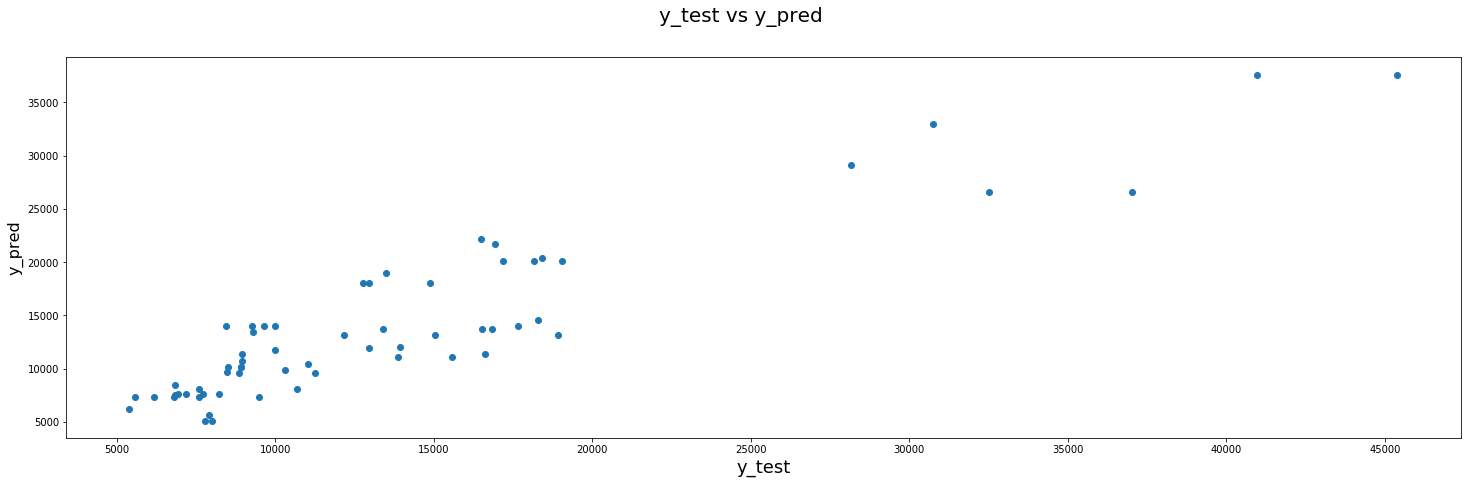

In [1608]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,predictions)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'Index')

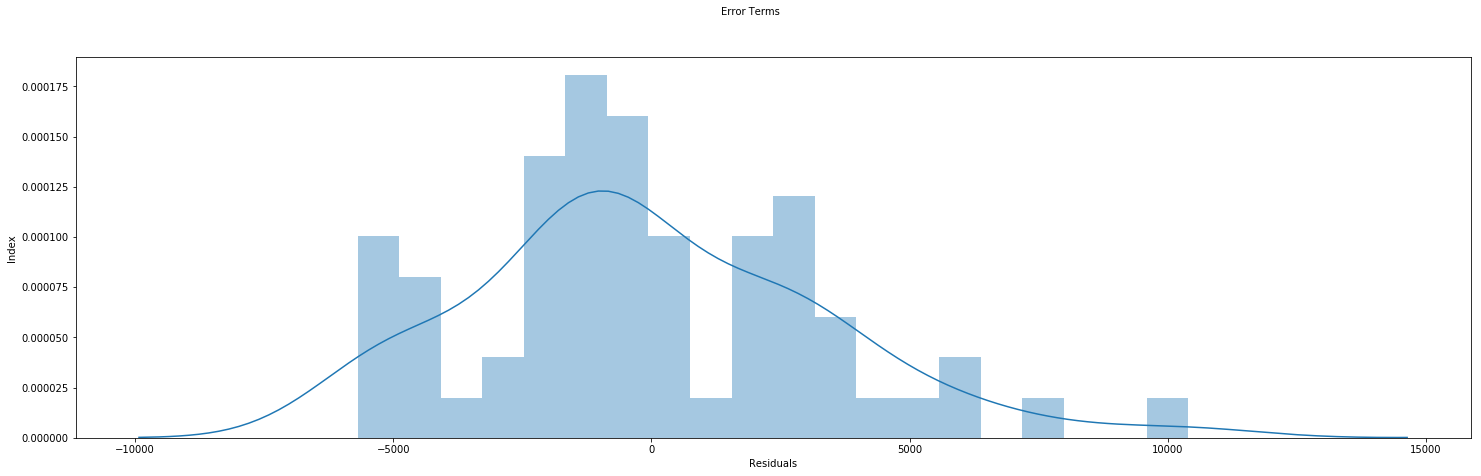

In [1609]:
# Residual Histogram
# sns.distplot((y_test-predictions),bins=50);
fig = plt.figure()
sns.distplot((y_test-predictions),bins=20)
fig.suptitle('Error Terms', fontsize=10)                  # Plot heading 
plt.xlabel('Residuals', fontsize=10)                  # X-label
plt.ylabel('Index', fontsize=10)        

In [1610]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE : 3360.052541572543


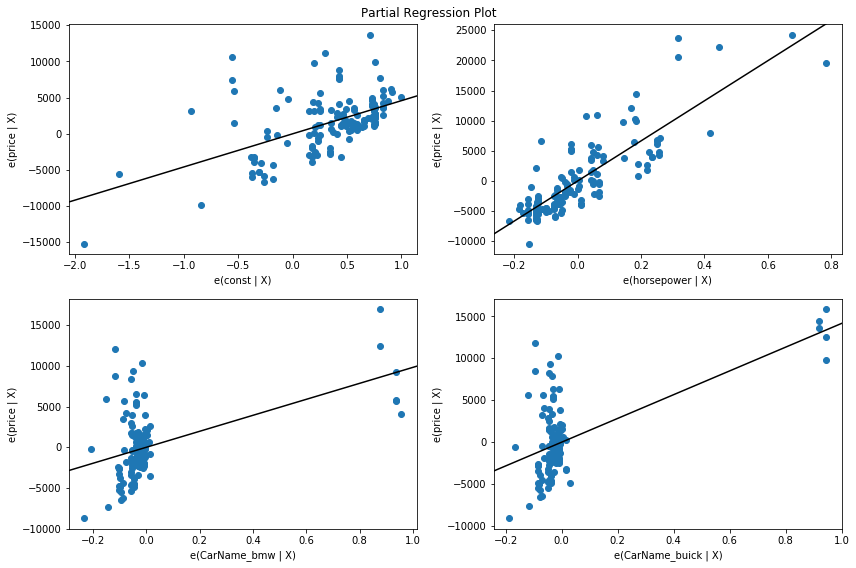

In [1611]:
# For a quick check of all the regressors  we will use plot_partregress_grid
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(carPrice_model_23, fig=fig)

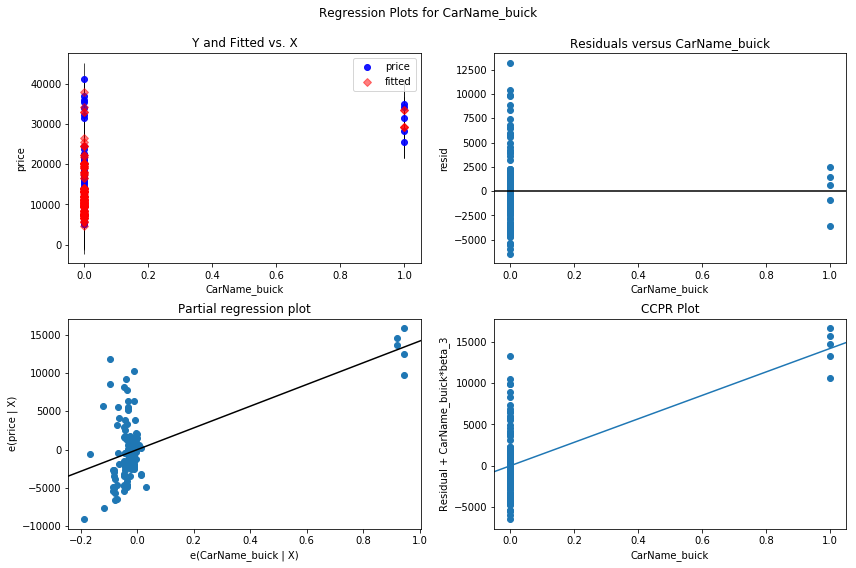

In [1612]:
import statsmodels.api as sms
# This produces our four regression plots for CarName_bmw
fig = plt.figure(figsize=(12,8))
fig = sms.graphics.plot_regress_exog(carPrice_model_23, "CarName_buick", fig=fig)

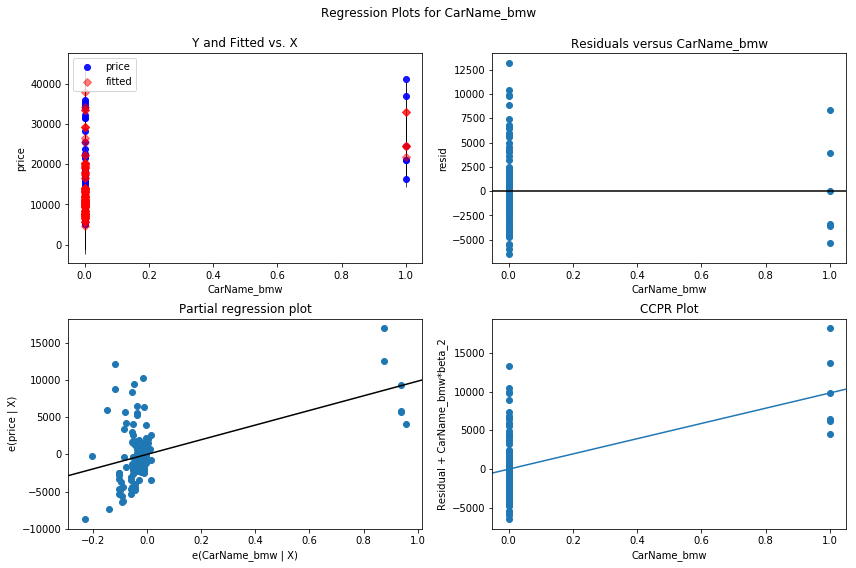

In [1613]:
import statsmodels.api as sms
# This produces our four regression plots for CarName_bmw
fig = plt.figure(figsize=(12,8))
fig = sms.graphics.plot_regress_exog(carPrice_model_23, "CarName_bmw", fig=fig)

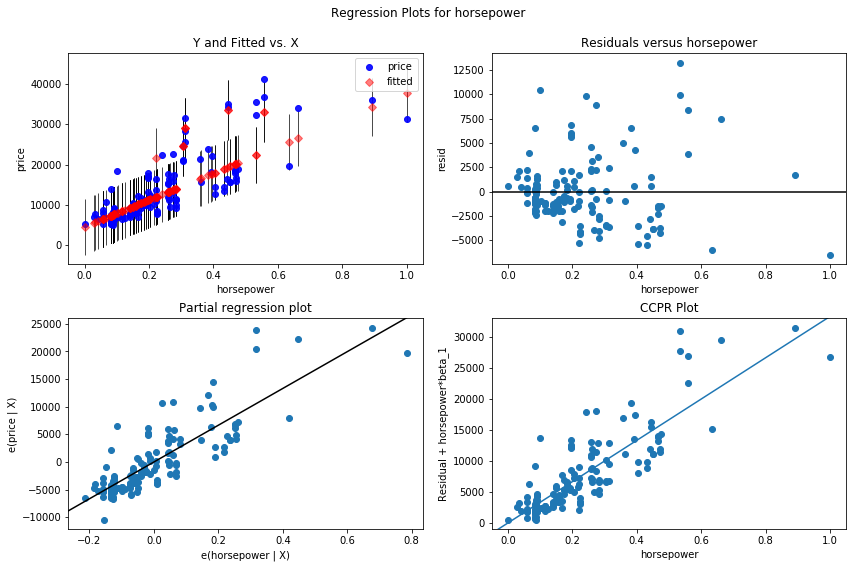

In [1614]:
# This produces our four regression plots for horsepower
fig = plt.figure(figsize=(12,8))
fig = sms.graphics.plot_regress_exog(carPrice_model_23, "horsepower", fig=fig)

## Conclusion

1- The R-squared and Adjusted R-squared for our final Model are 0.809 and 0.805 respectively.

2- We saw a few other significant variables like - power_to_weight_ratio, different engine types, and enginesize. 
   We removed these variables because of multicollinearity.

3- We have finalized on only 3 predictors in our Model.

       a) horsepower
   
       b) CarName_buick
   
       c) CarName_bmw
   
   
4- CarName_buick and CarName_bmw are the Car brands. Therefore, we have effectively two factors that impact the price of a Car.

  Brand and Power of a Car are the two main factors that decide the price of a Car in USA.
  
  Therefore, Geely Auto should manufacture Cars with high power and should also have a business strategy in place to build a brand.